In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import odeint
from scipy import optimize
#import Double_Null_utils as dnu
import ODE_utils as odeu
from scipy import *
import scipy
from scipy import stats

### This code uses initial parameters to calculate surface gravities 

Note that other codes have similar code built into them as well

(to test the parameter space without using the other codes)



In [31]:
M=1
Q=.40#0.9
Lambda=.00

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda==0.0:
    sol = optimize.root(fr,[0.05,1.33,-10],args=(M,Q,Lambda), method='hybr',tol=.0000001)
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=np.inf
    rneg=sol.x[2]

if Lambda>0.0:
    sol = optimize.root(fr,[0.5,1.41,170,-170],args=(M,Q,Lambda), method='hybr',tol=.0000001)
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
    rneg=sol.x[3]



def dfr(r,M,Q,Lambda):
    return -2*(Lambda*r**4-3*M*r+3*Q**2)/(3*r**3)

print(rminus,rplus,rcosm,rneg)

print(fr(np.array([rminus,rplus,rcosm,rneg]),M,Q,Lambda))

0.08350377596435081 1.9129659294705066 inf -2523411.1774743446
[-0.00497231 -0.00177437         nan  1.00000079]


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


^^^Make sure the root solver returns different values for the solutions^^^
You can always modify the guesses to fix (part within [ ] brakets)

In [29]:


def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print(kappaplus,kappaminus,kappacosm)
###double-check for Lambda=0
###kappaminus
print(np.abs((M*rminus-Q**2)/rminus**3.0))
print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

print(kappaplus-kappacosm)


0.12568678545848977 65.64075381021439 nan
65.64075378394448
65.64075378394448
nan


In [6]:
print(kappa(fr,rminus,M,Q,Lambda))
####Low Q-regime
print(kappa(fr,rminus,M,Q,Lambda)-2*kappa(fr,rcosm,M,Q,Lambda))
###High Q-regime
print(kappa(fr,rminus,M,Q,Lambda)-2*kappa(fr,rplus,M,Q,Lambda))

#print(2*kappaminus-kappacosm-kappaplus)

0.6911809250081234
0.6797684651421009
0.32484481893447004


In [7]:
def slopegiver(kappaminus,kappaplus,kappacosm,A,B,ve):
    return (kappaminus-kappacosm)+(kappacosm-kappaplus)/(1+A/B*np.exp((kappaplus-kappacosm)*ve))

In [8]:
print(slopegiver(kappaminus,kappaplus,kappacosm,1.0,1.0,125))

0.6854746950338769


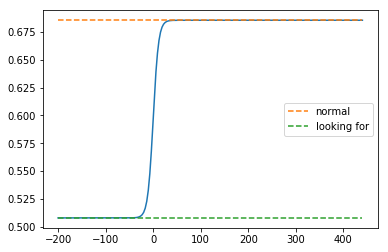

In [9]:
velist=np.linspace(-200,440,200)

plt.plot(velist,slopegiver(kappaminus,kappaplus,kappacosm,1.0,1.0,velist))
plt.plot([velist[0],velist[-1]],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label='normal')
plt.plot([velist[0],velist[-1]],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label='looking for')
plt.legend(loc='best')
plt.show()

In [8]:
def lnmgiver(kappaminus,kappaplus,kappacosm,A,B,ve):
    return (kappaminus-kappacosm)*ve+np.log(1.0+B/A*np.exp((kappacosm-kappaplus)*ve))+np.log(A)

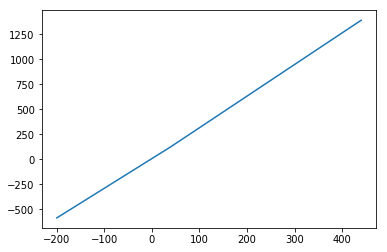

[ 3.1160346  11.81603304]


In [9]:
plt.plot(velist,lnmgiver(kappaminus,kappaplus,kappacosm,1.0,10**(3),velist))
#plt.ylim(0,80)
plt.show()

print(np.polyfit(velist,lnmgiver(kappaminus,kappaplus,kappacosm,1.0,10**(0),velist),1.0))

In [10]:
def vegiver(r,r0):
    C1=6/Lambda*(-(rcosm**2.0*np.log(np.abs(rcosm-r0)))/((rcosm-rminus)*(rcosm-rneg)*(rcosm-rplus))+(rminus**2.0*np.log(np.abs(r0-rminus)))/((rcosm-rminus)*(rminus-rneg)*(rminus-rplus))+(rneg**2.0*np.log(np.abs(r0-rneg)))/((rcosm-rneg)*(rneg-rminus)*(rneg-rplus))+(rplus**2.0*np.log(np.abs(r0-rplus)))/((rcosm-rplus)*(rplus-rminus)*(rplus-rneg)))
    f=6/Lambda*(-(rcosm**2.0*np.log(np.abs(rcosm-r)))/((rcosm-rminus)*(rcosm-rneg)*(rcosm-rplus))+(rminus**2.0*np.log(np.abs(r-rminus)))/((rcosm-rminus)*(rminus-rneg)*(rminus-rplus))+(rneg**2.0*np.log(np.abs(r-rneg)))/((rcosm-rneg)*(rneg-rminus)*(rneg-rplus))+(rplus**2.0*np.log(np.abs(r-rplus)))/((rcosm-rplus)*(rplus-rminus)*(rplus-rneg)))
    
    return C1-f

In [11]:
rlist=np.linspace(.1,5,10000)

plt.plot(rlist,-vegiver(rlist,1.0))
plt.plot(rlist,-vegiver(rlist,2.0))
plt.plot(rlist,-vegiver(rlist,2.5))
plt.plot(rlist,-vegiver(rlist,3.0))
plt.plot(rlist,-vegiver(rlist,3.5))
plt.plot(rlist,-vegiver(rlist,4.0))
plt.plot(rlist,-vegiver(rlist,4.1))
plt.ylim(-60,60)
plt.axvline(x=rplus,linewidth=0.5,linestyle='--',color='red')
plt.axvline(x=rminus,linewidth=0.5,linestyle='--',color='blue')
plt.axvline(x=rcosm,linewidth=0.5,linestyle='--',color='green')
plt.show()

ZeroDivisionError: float division by zero